Hi this is Challen testing a commit and push.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

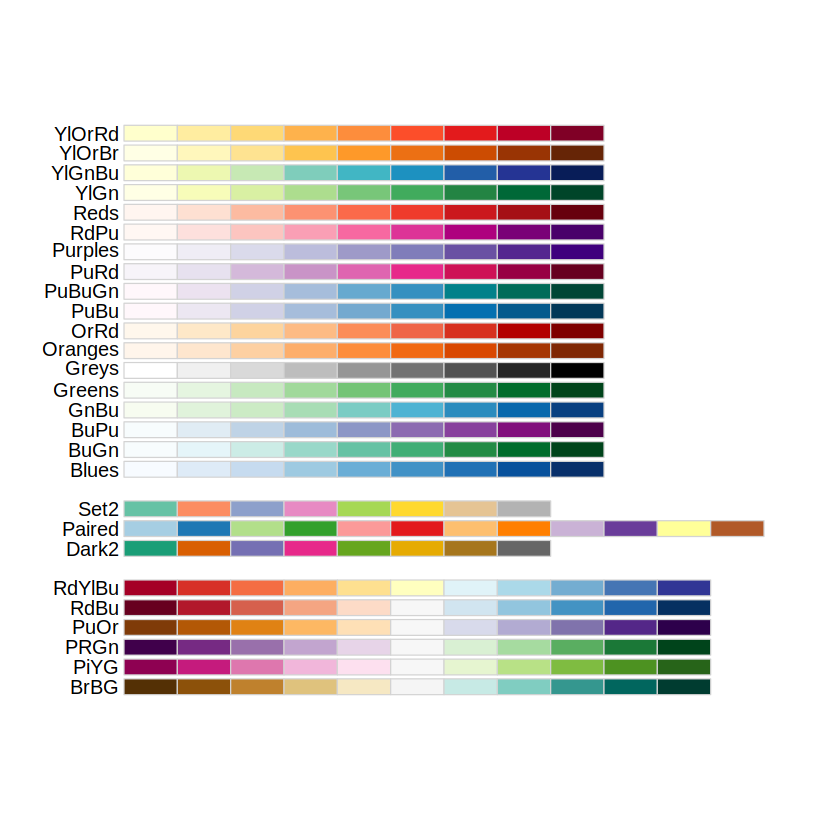

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)
options(repr.matrix.max.rows = 6)

In [3]:
housing_df <- read_csv("data/Housing.csv")

housing_df

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


**Data Summary**

In [22]:
housing_check_na <- housing_df |>
    summarize(check_for_na = sum(is.na(housing_df)))

housing_check_na

housing_bedroom_count <- housing_df |>
    group_by(bedrooms) |>
    summarize(observations = n())

housing_bedroom_count

check_for_na
<int>
0


bedrooms,observations
<dbl>,<int>
1,2
2,136
3,300
4,95
5,10
6,2


In [31]:
# Dividing area into bins to examine the distribution of house square footage

breaks <- c(0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000)
tags <- c("0-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000-6000", "6000-7000", "7000-8000", "8000-9000", "9000-10000",
          "10000-11000", "11000-12000", "12000-13000", "13000-14000", "14000-15000", "15000-16000", "16000-17000")

group_tags <- cut(housing_bedroom_aggregate$area, breaks = breaks, include.lowest = TRUE, right = FALSE, labels = tags)

# group_tags

housing_area_buckets <- housing_df |>
    select(price, area) |>
    mutate(area_bucket = group_tags) |>
    group_by(area_bucket) |>
    summarize(number_of_houses = n())

housing_area_buckets

area_bucket,number_of_houses
<fct>,<int>
1000-2000,6
2000-3000,46
3000-4000,144
⋮,⋮
13000-14000,2
15000-16000,1
16000-17000,1


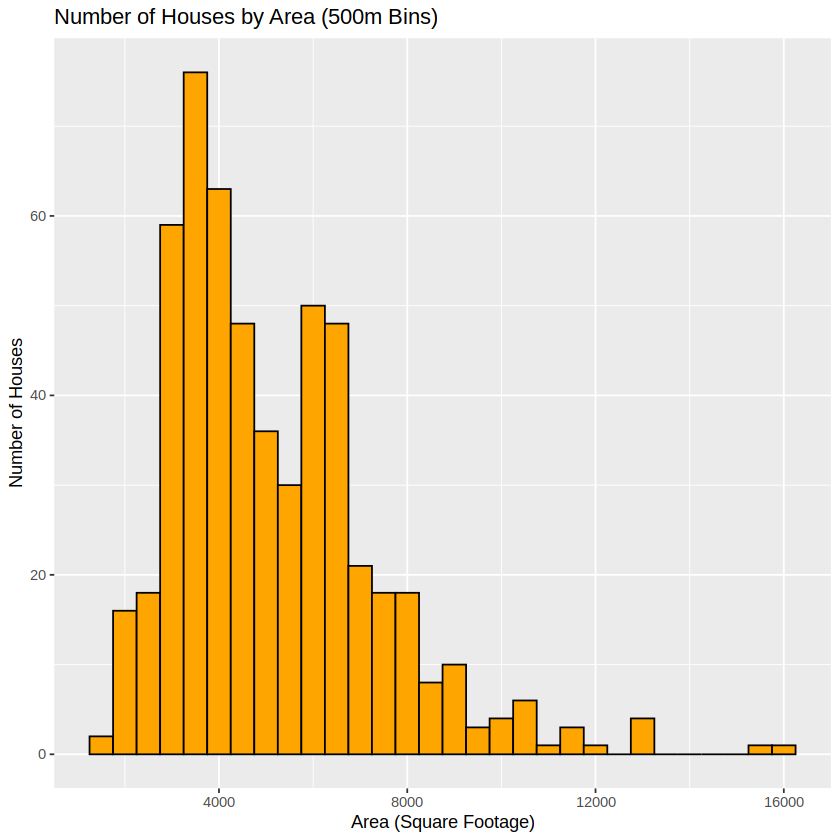

In [55]:
# Quick visualization

number_of_houses_by_area <- housing_df |>
    ggplot(aes(x = area)) +
    geom_histogram(binwidth = 500, colour = "black", fill = "orange") +
    ggtitle("Number of Houses by Area (500m Bins)") +
    labs(x = "Area (Square Footage)", y = "Number of Houses")

number_of_houses_by_area

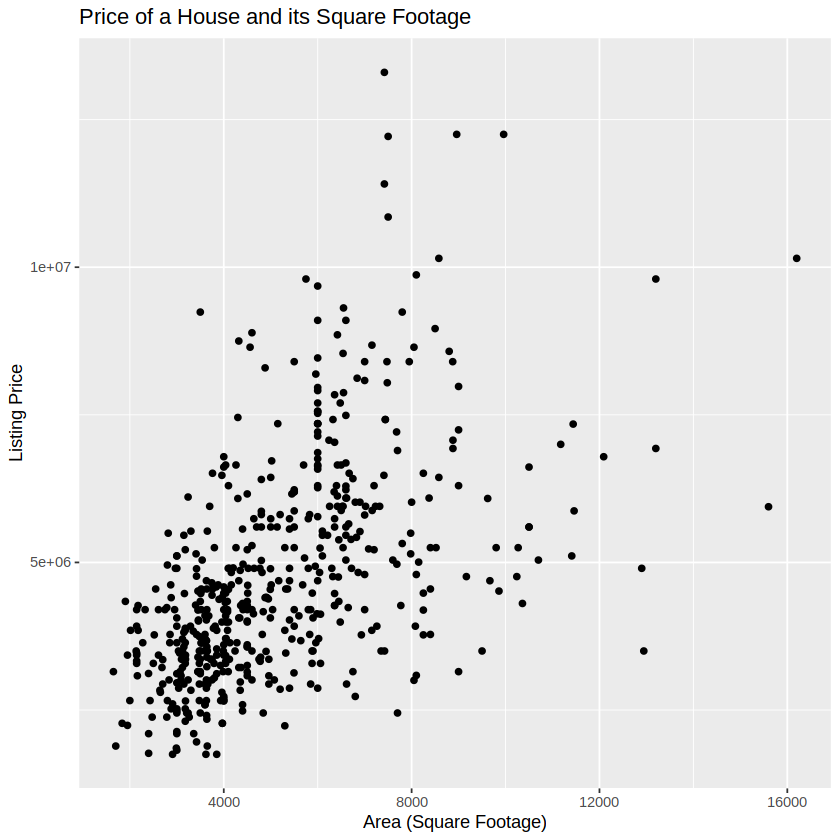

In [10]:
price_area_plot <- housing_df |>
    ggplot(aes(x = area, y = price)) +
    geom_point() +
    labs(x = "Area (Square Footage)", y = "Listing Price") +
    ggtitle("Price of a House and its Square Footage")

price_area_plot

**Initial Observations**

We can see from the plot above that generally, price increases with area, although there is significant variability. There may be other variables at play that are influencing price, beyond just area. For example, house price might go up with the number of bedrooms included, as it would be able to house more people.

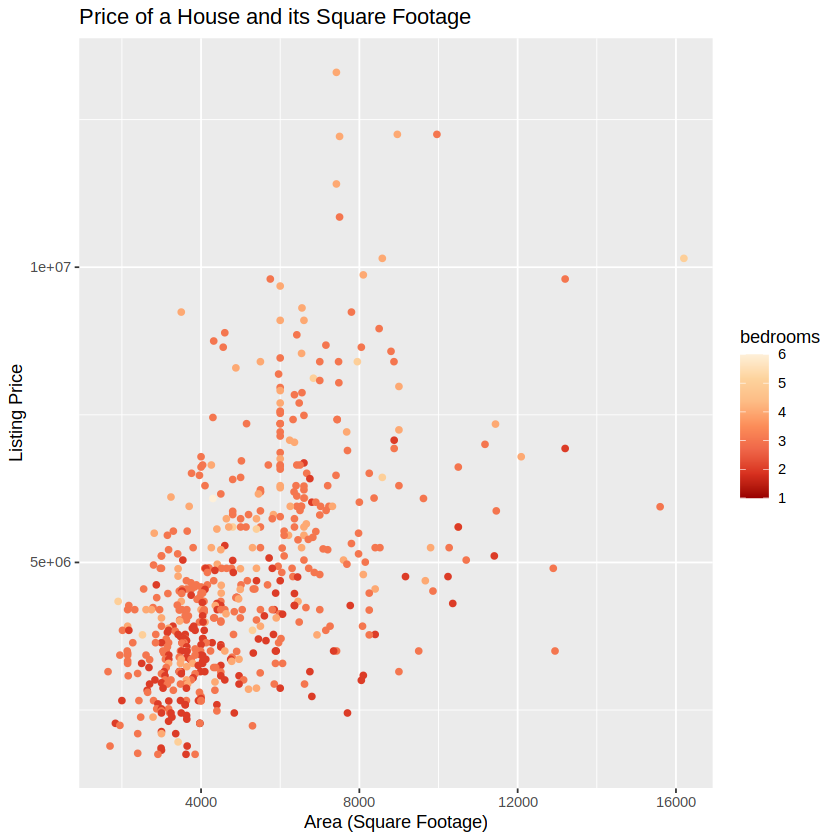

In [50]:
#Same plot as above, but now we examine other variables using colors

price_area_plot <- housing_df |>
    ggplot(aes(x = area, y = price, color = bedrooms)) +
    geom_point() +
    scale_colour_distiller(palette = "OrRd") +
    labs(x = "Area (Square Footage)", y = "Listing Price") +
    ggtitle("Price of a House and its Square Footage")

price_area_plot

**Initial Observations**

There's overplotting here, but if we look at houses with similar areas, we can see how generally, the darker colors (less bedrooms) have a lower price than the lighter colors (more bedrooms), despite being the same square footage. Now let's examine some other categorical variables like furnishing status.

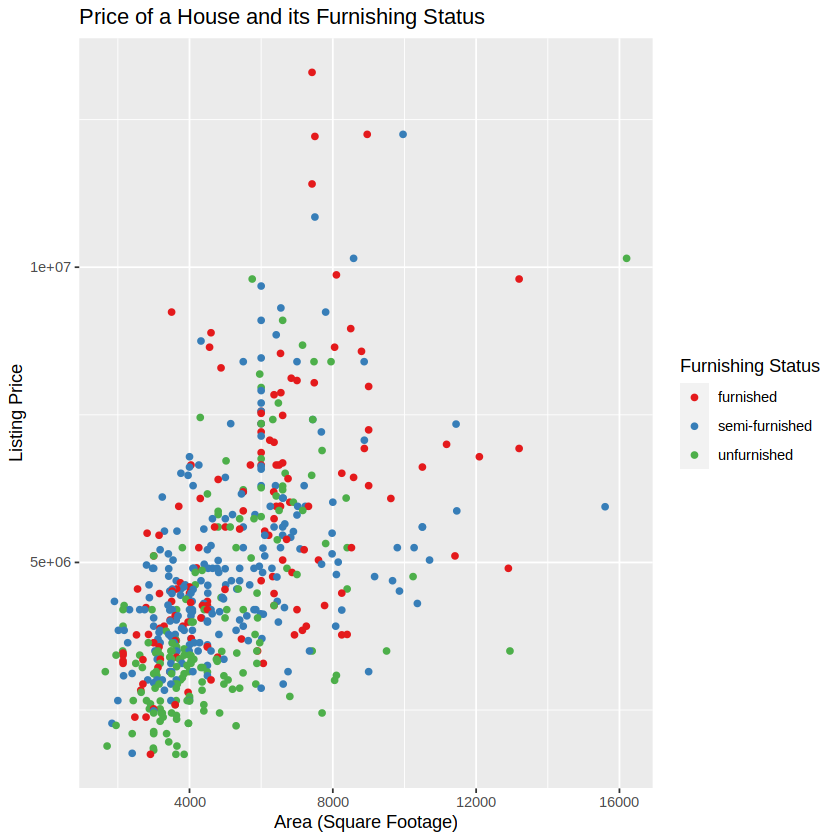

In [57]:
#Furnishing status plot

price_area_plot <- housing_df |>
    ggplot(aes(x = area, y = price, color = furnishingstatus)) +
    geom_point() +
    scale_colour_brewer(palette = "Set1") +
    labs(x = "Area (Square Footage)", y = "Listing Price", color = "Furnishing Status") +
    ggtitle("Price of a House and its Furnishing Status")

price_area_plot

**Initial Observations**

There may be some overplotting here, but from first glance, it seems like unfurnished is consistently priced lower than semi-furnished or furnished houses, when they are of similar area. Interestingly, semi-furnished and furnished houses seem to be in a similar price range, despite a fully furnished house adding more value.

**Further Analysis**

Zooming in on the bottom left cluster would likely give the best results, as we could see what's happening a bit clearer, and there aren't as many outliers.

In [52]:
housing_df_zoomed <- housing_df |>
    filter(price < 10000000 & area < 12000)

housing_df_zoomed

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


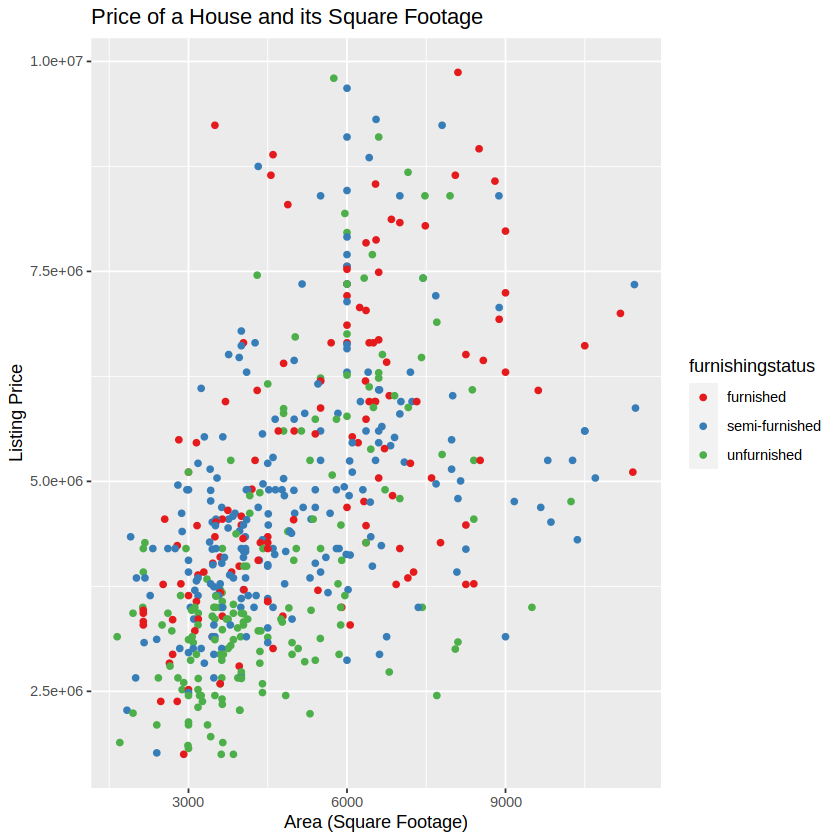

In [55]:
price_area_plot <- housing_df_zoomed |>
    ggplot(aes(x = area, y = price, color = furnishingstatus)) +
    geom_point() +
    scale_colour_brewer(palette = "Set1") +
    labs(x = "Area (Square Footage)", y = "Listing Price") +
    ggtitle("Price of a House and its Square Footage")

price_area_plot

**Further Analysis**

I'd also like to dive deeper into the effect number of bedrooms has on price using aggregate data to avoid overplotting. I'll bucket the square footage into 1000 square foot bins and then examine the mean price of the houses based on bedrooms available.

In [117]:
housing_bedroom_aggregate <- housing_df |>
    select(price, area, bedrooms)

housing_bedroom_aggregate

price,area,bedrooms
<dbl>,<dbl>,<dbl>
13300000,7420,4
12250000,8960,4
12250000,9960,3
⋮,⋮,⋮
1750000,3620,2
1750000,2910,3
1750000,3850,3


In [118]:
breaks <- c(0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000)
tags <- c("0-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000-6000", "6000-7000", "7000-8000", "8000-9000", "9000-10000",
          "10000-11000", "11000-12000", "12000-13000", "13000-14000", "14000-15000", "15000-16000", "16000-17000")

group_tags <- cut(housing_bedroom_aggregate$area, breaks = breaks, include.lowest = TRUE, right = FALSE, labels = tags)

# group_tags

housing_bedroom_aggregate <- housing_bedroom_aggregate |>
    mutate(bucket = group_tags) |>
    group_by(bucket, bedrooms) |>
    summarize(price = mean(price))

housing_bedroom_aggregate

`summarise()` has grouped output by 'bucket'. You can override using the
`.groups` argument.


bucket,bedrooms,price
<fct>,<dbl>,<dbl>
1000-2000,2,2275000
1000-2000,3,2677500
1000-2000,5,4340000
⋮,⋮,⋮
13000-14000,3,9800000
15000-16000,3,5943000
16000-17000,5,10150000


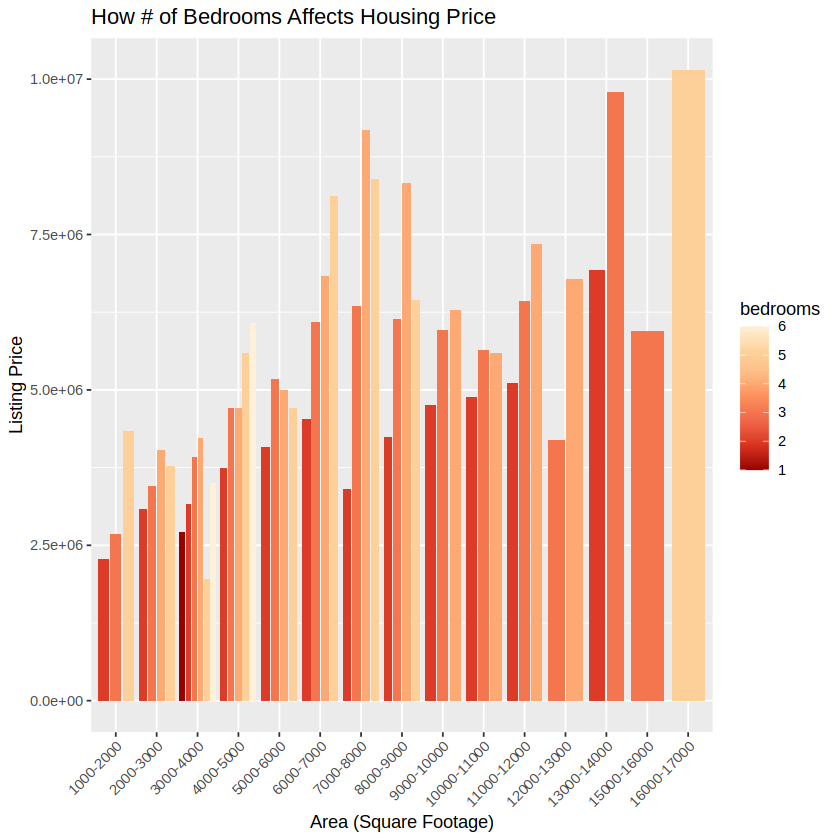

In [120]:
# Plotting this monstrosity

housing_bedroom_aggregate_plot <- housing_bedroom_aggregate |>
    ggplot(aes(x = bucket, y = price, fill = bedrooms)) +
    geom_bar(stat = "identity", position = "dodge2") +
    scale_fill_distiller(palette = "OrRd") +
    labs(x = "Area (Square Footage)", y = "Listing Price") +
    ggtitle("How # of Bedrooms Affects Housing Price") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

housing_bedroom_aggregate_plot

**Findings**

It's consistent across most area buckets that having less bedrooms means less average price. While there are some outliers, they are typically seen in the higher ranges of square footage area. Up until 8000 square feet, the gradual climb in price is a positive relationship with an increase in bedrooms. We can conclude then, that number of bedrooms has a significant impact on price, and should be included in our predictive model.